## Guided exercise...

We will load and explore a data set from the UCI Machine Learning Repository...

[https://archive.ics.uci.edu/ml/datasets.html](https://archive.ics.uci.edu/ml/datasets.html)

In [5]:
#I'm going to use this:

#  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

import numpy as np
np.loadtxt(open("wdbc.data.txt", "r"), delimiter=",", skiprows=0)

#Boom (There will be problems here, because benign="B" and malignant="M" cannot be converted to floats)

ValueError: could not convert string to float: 'M'

# Why go boom?

The problem, as you can see from the cell below, is not that numpy can't handle string.

The problem is just that the CSV reader isn't very good.  

We go on to find the characters that are blowing things up.


In [6]:
import numpy as np
np.array(['a'])

array(['a'], dtype='<U1')

In [7]:
fp = open("wdbc.data.txt","r")
csv_lines = fp.readlines()

symb = set()
for line in csv_lines[:]:
    line = line.split(',')
    symb.add(line[1])
print( symb    )
fp.close()

{'M', 'B'}


# A fix

We can awkwardly fix the problem simply by replacing the offending characters with numbers.


In [8]:
fp = open("wdbc.data.txt")
data = fp.read()
data = data.replace("M",'1')
data = data.replace("B",'0')
fp.close()
fp = open("num_data.txt","w")
fp.write(data)
fp.close()

# How now?

Now the naive CSV reader works fine.


In [9]:
D = np.loadtxt(open("num_data.txt", "rb"), delimiter=",", skiprows=0)
D[:2]

array([[8.42302e+05, 1.00000e+00, 1.79900e+01, 1.03800e+01, 1.22800e+02,
        1.00100e+03, 1.18400e-01, 2.77600e-01, 3.00100e-01, 1.47100e-01,
        2.41900e-01, 7.87100e-02, 1.09500e+00, 9.05300e-01, 8.58900e+00,
        1.53400e+02, 6.39900e-03, 4.90400e-02, 5.37300e-02, 1.58700e-02,
        3.00300e-02, 6.19300e-03, 2.53800e+01, 1.73300e+01, 1.84600e+02,
        2.01900e+03, 1.62200e-01, 6.65600e-01, 7.11900e-01, 2.65400e-01,
        4.60100e-01, 1.18900e-01],
       [8.42517e+05, 1.00000e+00, 2.05700e+01, 1.77700e+01, 1.32900e+02,
        1.32600e+03, 8.47400e-02, 7.86400e-02, 8.69000e-02, 7.01700e-02,
        1.81200e-01, 5.66700e-02, 5.43500e-01, 7.33900e-01, 3.39800e+00,
        7.40800e+01, 5.22500e-03, 1.30800e-02, 1.86000e-02, 1.34000e-02,
        1.38900e-02, 3.53200e-03, 2.49900e+01, 2.34100e+01, 1.58800e+02,
        1.95600e+03, 1.23800e-01, 1.86600e-01, 2.41600e-01, 1.86000e-01,
        2.75000e-01, 8.90200e-02]])

In [10]:
D.shape

(569, 32)

In [11]:
D.mean(axis=0)

array([3.03718314e+07, 3.72583480e-01, 1.41272917e+01, 1.92896485e+01,
       9.19690334e+01, 6.54889104e+02, 9.63602812e-02, 1.04340984e-01,
       8.87993158e-02, 4.89191459e-02, 1.81161863e-01, 6.27976098e-02,
       4.05172056e-01, 1.21685343e+00, 2.86605923e+00, 4.03370791e+01,
       7.04097891e-03, 2.54781388e-02, 3.18937163e-02, 1.17961371e-02,
       2.05422988e-02, 3.79490387e-03, 1.62691898e+01, 2.56772232e+01,
       1.07261213e+02, 8.80583128e+02, 1.32368594e-01, 2.54265044e-01,
       2.72188483e-01, 1.14606223e-01, 2.90075571e-01, 8.39458172e-02])

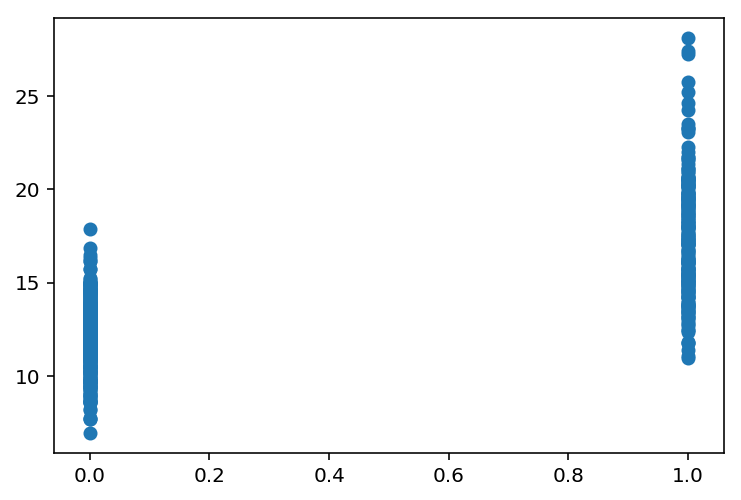

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x  = D[:,1]
y  = D[:,2]

plt.scatter(x,y)
plt.show()
#for z in zip(x,y):
#    print (z)

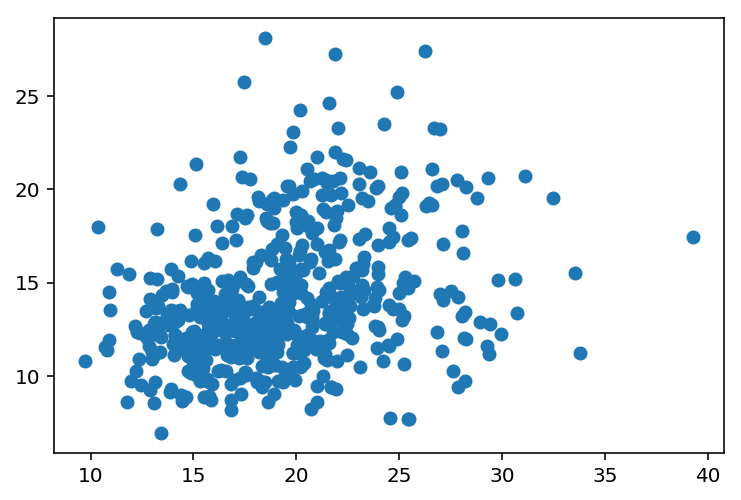

In [13]:
x  = D[:,3]
y  = D[:,2]

plt.scatter(x,y)
plt.show()

In [14]:
np.corrcoef(x,y)

array([[1.        , 0.32378189],
       [0.32378189, 1.        ]])

In [15]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope,intercept

(0.26529032869654434, 9.009934547256911)

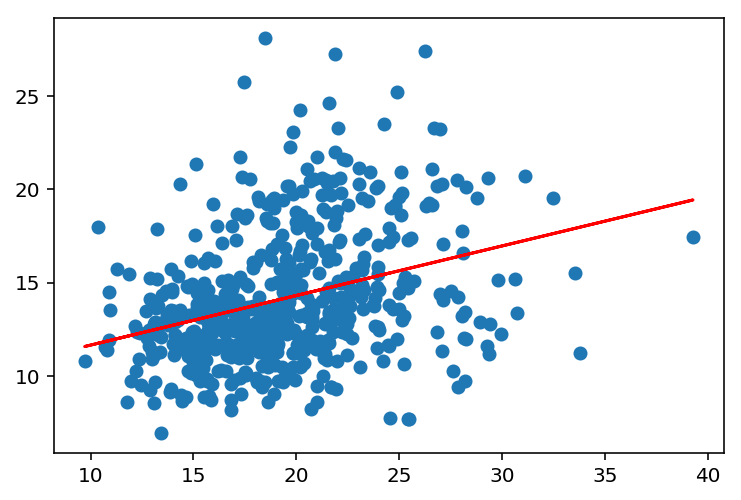

In [16]:
x  = D[:,3]
y  = D[:,2]

reg_y = slope*x+intercept
plt.scatter(x,y)
plt.plot(x,reg_y,color='red')
plt.show()

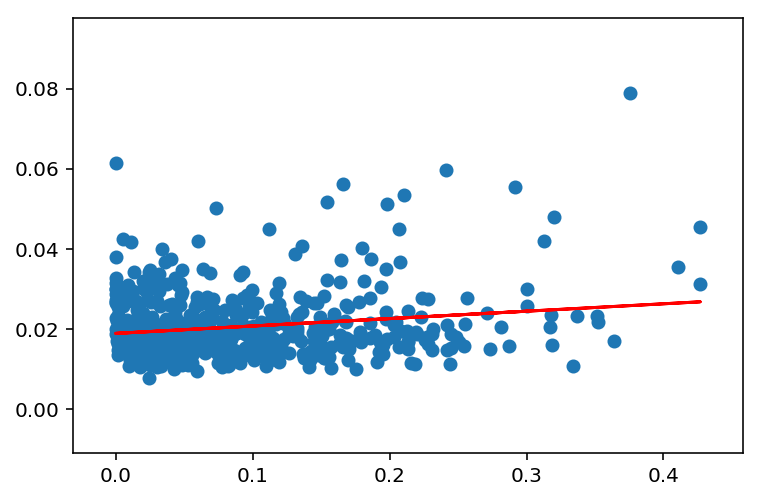

In [17]:
x  = D[:,8]
y  = D[:,20]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
reg_y = slope*x+intercept
plt.scatter(x,y)
plt.plot(x,reg_y,color='red')
plt.show()

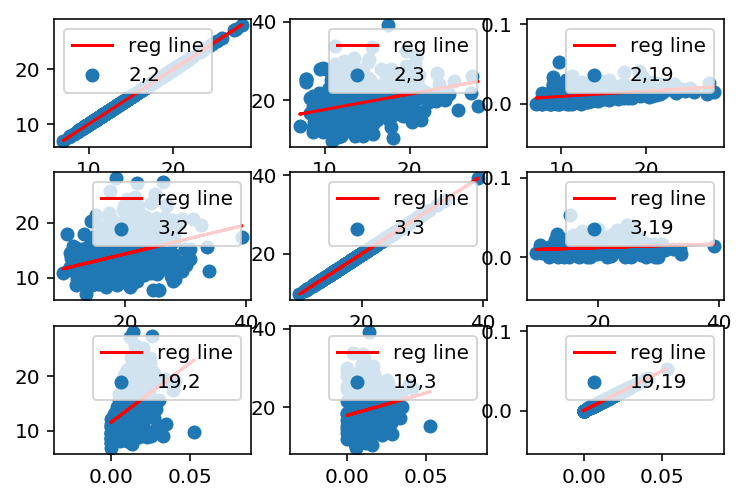

In [19]:
features = [2,3,19]
subplot = 1
for f in features:
    for s in features:
        plt.subplot(len(features), len(features), subplot)
        subplot += 1
        x  = D[:,f]
        y  = D[:,s]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        reg_y = slope*x+intercept
        plt.scatter(x,y)
        plt.plot(x,reg_y,color='red')
        plt.legend(["reg line","{},{}".format(f,s)])
plt.show()